# Cmp310 Assesment
### World Population estimates and projections from 1980 to 2022

## Exploratory Data Analysis (EDA)

In [1]:
#import all needed libaries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
#Load dataset into dataframe 
population = pd.read_csv('world_population.csv') 

In [2]:
#See the shape of the data
np.shape(population)

(234, 17)

In [3]:
#View first five rows
population.head()

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


Through the first five rows we can determine that this dataset does not classify any into any classes/labels
#### Therefore
A type of regression will be used

In [4]:
#View column information
population.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank                         234 non-null    int64  
 1   CCA3                         234 non-null    object 
 2   Country/Territory            234 non-null    object 
 3   Capital                      234 non-null    object 
 4   Continent                    234 non-null    object 
 5   2022 Population              234 non-null    int64  
 6   2020 Population              234 non-null    int64  
 7   2015 Population              234 non-null    int64  
 8   2010 Population              234 non-null    int64  
 9   2000 Population              234 non-null    int64  
 10  1990 Population              234 non-null    int64  
 11  1980 Population              234 non-null    int64  
 12  1970 Population              234 non-null    int64  
 13  Area (km²)          

In [5]:
#View column summary statistics
population.describe()

,Rank,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
count,234.000000,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,234.000000,234.000000,234.000000
mean,117.500000,3.407441e+07,3.350107e+07,3.172996e+07,2.984524e+07,2.626947e+07,2.271022e+07,1.898462e+07,1.578691e+07,5.814494e+05,452.127044,1.009577,0.427051
std,67.694165,1.367664e+08,1.355899e+08,1.304050e+08,1.242185e+08,1.116982e+08,9.783217e+07,8.178519e+07,6.779509e+07,1.761841e+06,2066.121904,0.013385,1.714977
min,1.000000,5.100000e+02,5.200000e+02,5.640000e+02,5.960000e+02,6.510000e+02,7.000000e+02,7.330000e+02,7.520000e+02,1.000000e+00,0.026100,0.912000,0.000000
25%,59.250000,4.197385e+05,4.152845e+05,4.046760e+05,3.931490e+05,3.272420e+05,2.641158e+05,2.296142e+05,1.559970e+05,2.650000e+03,38.417875,1.001775,0.010000
50%,117.500000,5.559944e+06,5.493074e+06,5.307400e+06,4.942770e+06,4.292907e+06,3.825410e+06,3.141146e+06,2.604830e+06,8.119950e+04,95.346750,1.007900,0.070000
75%,175.750000,2.247650e+07,2.144798e+07,1.973085e+07,1.915957e+07,1.576230e+07,1.186923e+07,9.826054e+06,8.817329e+06,4.304258e+05,238.933250,1.016950,0.280000
max,234.000000,1.425887e+09,1.424930e+09,1.393715e+09,1.348191e+09,1.264099e+09,1.153704e+09,9.823725e+08,8.225344e+08,1.709824e+07,23172.266700,1.069100,17.880000


In [6]:
#View the sum of null data in column
population.isnull().sum()

Rank                           0
CCA3                           0
Country/Territory              0
Capital                        0
Continent                      0
2022 Population                0
2020 Population                0
2015 Population                0
2010 Population                0
2000 Population                0
1990 Population                0
1980 Population                0
1970 Population                0
Area (km²)                     0
Density (per km²)              0
Growth Rate                    0
World Population Percentage    0
dtype: int64

In [7]:
#View the amount of duplicate values in the dataset
population.duplicated().sum()

0

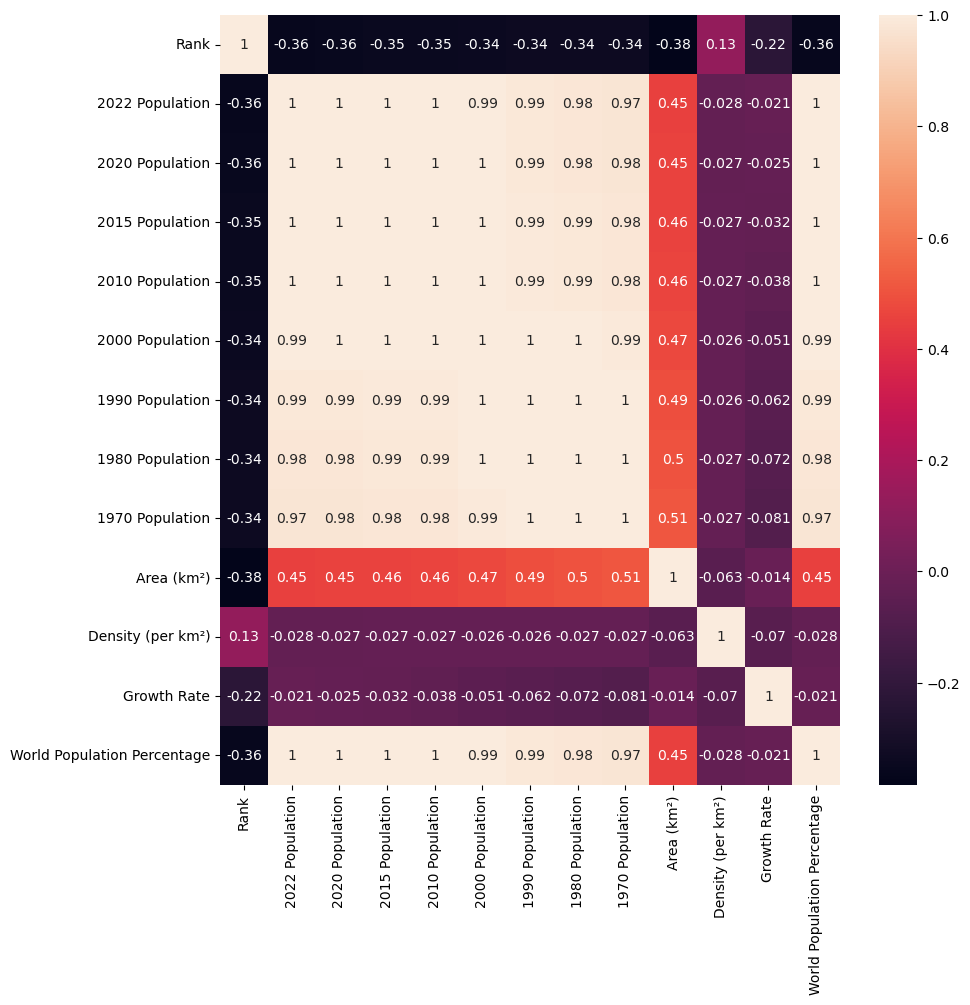

In [8]:
#Visualise data correlation between columns
plt.figure(figsize=(10,10))
sns.heatmap(population.corr(),annot=True)
plt.show()

In [9]:
#Visualise all the data in a pair-plot
sns.pairplot(data=population, height=10)

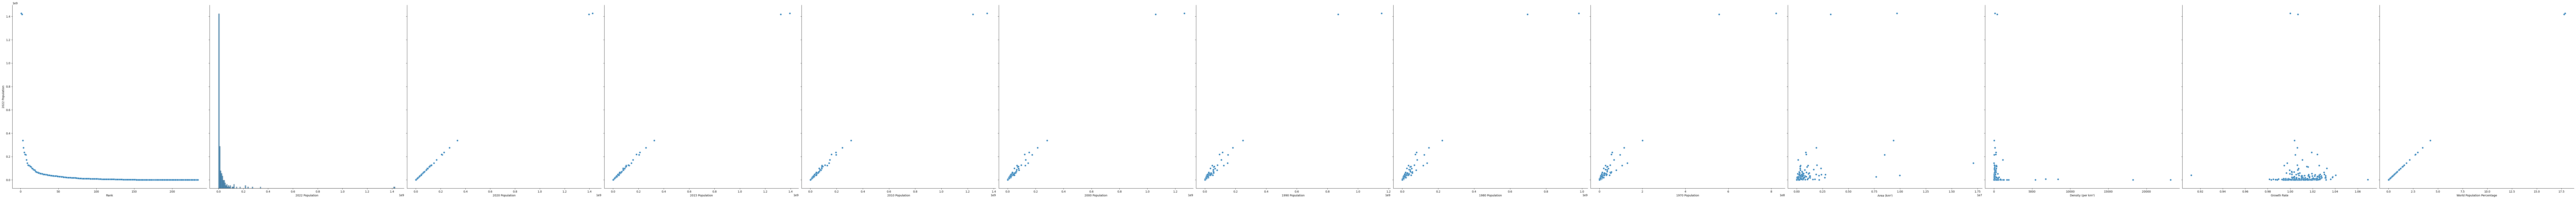

In [10]:
#Visualise all the data in a pair-plot against the 2022
sns.pairplot(data=population, y_vars=["2022 Population"], height=10)

## Data Pre-processing and Feature extraction



In [11]:
#Extract useful and correlating features REMOVE
finalpop = population.drop(columns = ['Rank', 'CCA3', 'Country/Territory' , 'Capital', 'Continent', 'Area (km²)', 'Density (per km²)', 'Growth Rate', 'World Population Percentage'])
finalpop.head()

,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population
0,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971
1,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731
2,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915
3,44273,46189,51368,54849,58230,47818,32886,27075
4,79824,77700,71746,71519,66097,53569,35611,19860


In [12]:
#Simplify the column name 
for col in population.columns:
    if 'Population' and '0' in col:
        population = population.rename(columns={col: col.split(' ')[0]})       
population.head(0)

,Rank,CCA3,Country/Territory,Capital,Continent,2022,2020,2015,2010,2000,1990,1980,1970,Area (km²),Density (per km²),Growth Rate,World Population Percentage


In [13]:
#Create list of string to simlify using the columns in future instances
years = list(map(str, ("1970", "1980", "1990", "2000", "2010", "2015", "2020", "2022")))
years

['1970', '1980', '1990', '2000', '2010', '2015', '2020', '2022']

In [14]:
#Get the sum of all values in each year column
finalpop = pd.DataFrame(population[years].sum(axis=0)) 

In [15]:
#Reset index
finalpop.reset_index(inplace = True) 

In [16]:
#Rename columns
finalpop.columns = ['Year', 'Total'] 
finalpop.head()

,Year,Total
0,1970,3694136661
1,1980,4442400371
2,1990,5314191665
3,2000,6147055703
4,2010,6983784998


### EDA Results
Through the data exploration performed above we can determine that the correlating data are population 1970 through 2022 and world population percentage. Additionally we can interpret through the pair plots against population 2022 that population 
1970-2020 has a 'Linear' trend whereas World Population Percentage in a straight line.
#### Therefore
Linear Regression should be used for the years as dependant variables
Allowing us to extrapolate and therefore predict the total world population in the following years
# Model
The general equation of linear regression is the following
$y$ = $ θ_0$ + $θ_1x_1$ + $θ_2x_2$ + ... + $θ_nx_n$

-  $y$ : Dependent Variable
-  $θ_0$ : Intercept
-  $θ_1$ : Coefficient of the first feature
-  $θ_n$ : Coefficient of the $n$<sup>th</sup> feature<br>



## Simple Linear Regression

After the data preprocessing there is one dependent variable being the population and one independent variable the year

Therefore the equation becomes: $Population$ = $ θ_0$ + $θ_1 $x $Year$

And $ θ_0$, $θ_1$ become the unkown values that the model will determine

Allowing for the prediction and estimation of future populations




In [17]:
#Categorise values into Independent Variables
X = pd.DataFrame(finalpop.iloc[:, :1].values)
print(X.shape)
X.head()

(8, 1)


,0
0,1970
1,1980
2,1990
3,2000
4,2010


In [18]:
#and Dependent Variables 
y = pd.DataFrame(finalpop.iloc[:, 1].values)
print(y.shape)
y.head()

(8, 1)


,0
0,3694136661
1,4442400371
2,5314191665
3,6147055703
4,6983784998


## Data Split
### Case 1

In [19]:
#Split Data with an 80/20 split and verifying its shape
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X1_train.shape, X1_test.shape, y1_train.shape, y1_test.shape)

(6, 1) (2, 1) (6, 1) (2, 1)


### Case 2

In [20]:
#Split Data with an 70/30 split and verifying its shape
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X2_train.shape, X2_test.shape, y2_train.shape, y2_test.shape)

(5, 1) (3, 1) (5, 1) (3, 1)


### Case 3

In [21]:
#Split Data with an 60/40 split and verifying its shape
X3_train, X3_test, y3_train, y3_test = train_test_split(X, y, test_size=0.4, random_state=42)
print(X3_train.shape, X3_test.shape, y3_train.shape, y3_test.shape)

(4, 1) (4, 1) (4, 1) (4, 1)


## Training
### Case 1

In [22]:
#Initialise machine learning model and fit trainning data in it for case 1
LR1 = LinearRegression()
LR1.fit(X1_train, y1_train)

LinearRegression()

### Case 2

In [23]:
#Initialise machine learning model and fit trainning data in it for case 2
LR2 = LinearRegression()
LR2.fit(X2_train, y2_train)

LinearRegression()

### Case 3

In [24]:
#Initialise machine learning model and fit trainning data in it for case 3
LR3 = LinearRegression()
LR3.fit(X3_train, y3_train)

LinearRegression()

## Results

### Case 1

In [25]:
#Print the model's intercept and coefficient of the first feature
print(LR1.intercept_)
print(LR1.coef_)

[-1.59317996e+11]
[[82738911.80612247]]


Considering $θ_0$ is the intercept and $θ_1$ is the coefficient of $Year$ we can input the values we found in the equation:

$Population$ = $ -159317996000$ + $82738912 $x $Year$

We should be able to use the learned coefficients to make sales predictions on the test data and assess the performance.

But how well does this model fit the training data? Let us predict on `X_train` 

<AxesSubplot:ylabel='0'>

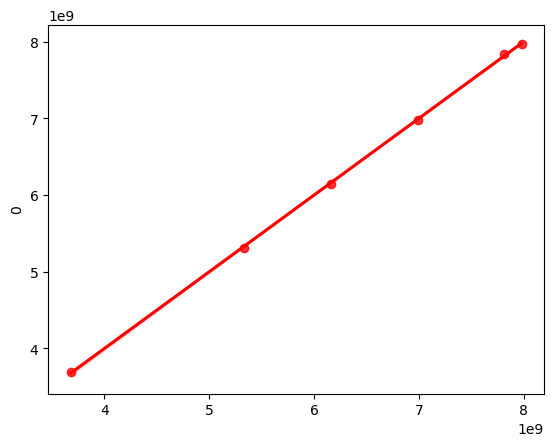

In [26]:
#Plotting the regression on training data
sns.regplot(x=LR1.predict(X1_train), y=y1_train, color='red', label="X_train predictions vs y_train Case 1")

<AxesSubplot:xlabel='Actual', ylabel='Predicted'>

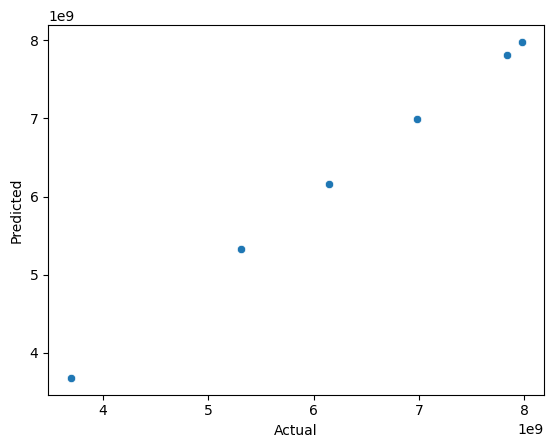

In [27]:
#Add actual and prediction values in ine dataframe and plot in ScatterPlot
sct = LR1.predict(X1_train)
sct1d = sct.flatten()
sctpltdata = pd.DataFrame(y1_train.iloc[:, 0].values)
sctpltdata['Predicted'] = sct1d.tolist()
sctpltdata.columns = ['Actual', 'Predicted'] 
sns.scatterplot(data=sctpltdata, x="Actual", y="Predicted")

### Case 2

In [28]:
#Print the model's intercept and coefficient of the first feature
print(LR2.intercept_)
print(LR2.coef_)

[-1.61059122e+11]
[[83604192.86323853]]


Considering $θ_0$ is the intercept and $θ_1$ is the coefficient of $Year$ we can input the values we found in the equation:

$Population$ = $ -161059122000 $ + $ 83604193 $x $Year$

We should be able to use the learned coefficients to make sales predictions on the test data and assess the performance.

But how well does this model fit the training data? Let us predict on `X_train` 

<AxesSubplot:ylabel='0'>

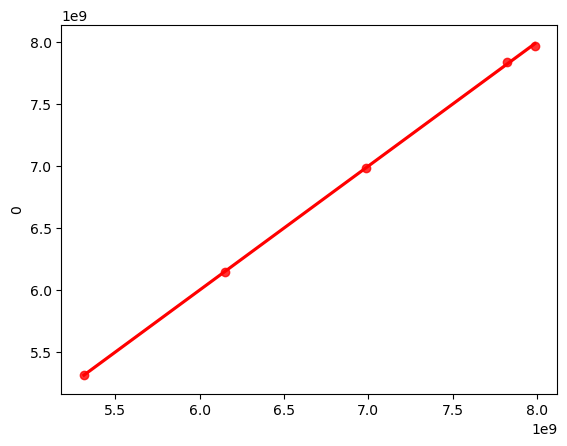

In [29]:
#Plotting the regression on training data
sns.regplot(x=LR2.predict(X2_train), y=y2_train, color='red', label="X_train predictions vs y_train Case 2")

<AxesSubplot:xlabel='Actual', ylabel='Predicted'>

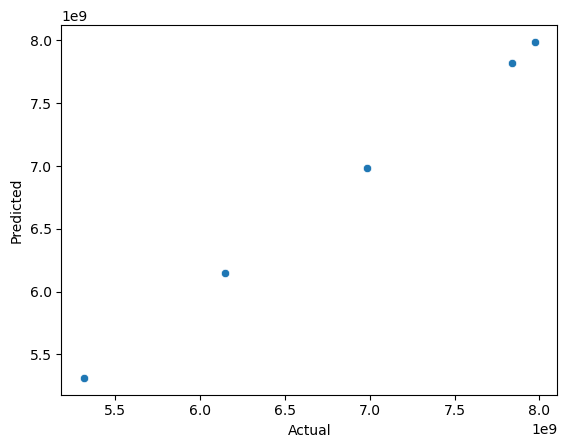

In [30]:
#Add actual and prediction values in ine dataframe and plot in ScatterPlot
sct = LR2.predict(X2_train)
sct1d = sct.flatten()
sctpltdata = pd.DataFrame(y2_train.iloc[:, 0].values)
sctpltdata['Predicted'] = sct1d.tolist()
sctpltdata.columns = ['Actual', 'Predicted'] 
sns.scatterplot(data=sctpltdata, x="Actual", y="Predicted")

### Case 3

In [31]:
#Print the model's intercept and coefficient of the first feature
print(LR3.intercept_)
print(LR3.coef_)

[-1.62087647e+11]
[[84119061.08999997]]


Considering $θ_0$ is the intercept and $θ_1$ is the coefficient of $Year$ we can input the values we found in the equation:

$Population$ = $ -1.62087647000 $ + $ 84119061 $x $Year$

We should be able to use the learned coefficients to make sales predictions on the test data and assess the performance.

But how well does this model fit the training data? Let us predict on `X_train` 

<AxesSubplot:ylabel='0'>

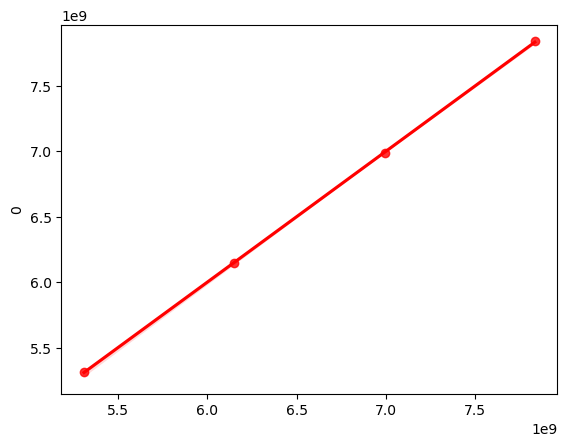

In [32]:
#Plotting the regression on training data
sns.regplot(x=LR3.predict(X3_train), y=y3_train, color='red', label="X_train predictions vs y_train Case 3")

<AxesSubplot:xlabel='Actual', ylabel='Predicted'>

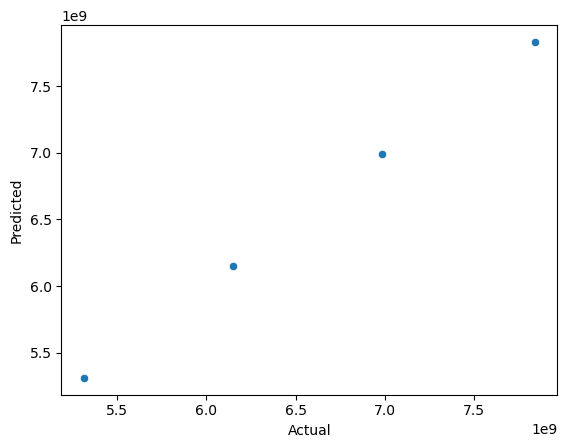

In [33]:
#Add actual and prediction values in ine dataframe and plot in ScatterPlot
sct = LR3.predict(X3_train)
sct1d = sct.flatten()
sctpltdata = pd.DataFrame(y3_train.iloc[:, 0].values)
sctpltdata['Predicted'] = sct1d.tolist()
sctpltdata.columns = ['Actual', 'Predicted'] 
sns.scatterplot(data=sctpltdata, x="Actual", y="Predicted")

## Predictions
### Case 1

In [34]:
#Predict on the X_test
y1_hat = LR1.predict(X1_test)
y1_hat

array([[4.50504939e+09],
       [7.40091130e+09]])

In [35]:
#Combine predictions and correct values in one dataframe
pred1 = pd.DataFrame(y1_test.iloc[:, 0].values)
y1_hat1d = y1_hat.flatten()
pred1['Predicted'] = y1_hat1d.tolist()
pred1.columns = ['Actual', 'Predicted'] 
pred1

,Actual,Predicted
0,4442400371,4.505049e+09
1,7424809761,7.400911e+09


<AxesSubplot:>

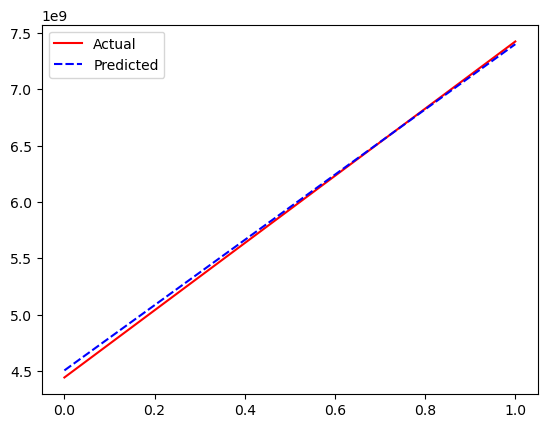

In [36]:
#Plotting lineplot from predictions
sns.lineplot(data=pred1, palette=['red', 'blue'])

### Case 2

In [37]:
#Predict on the X_test
y2_hat = LR2.predict(X2_test)
y2_hat

array([[4.47718012e+09],
       [7.40332688e+09],
       [3.64113820e+09]])

In [38]:
#Combine predictions and correct values in one dataframe
pred2 = pd.DataFrame(y2_test.iloc[:, 0].values)
y2_hat1d = y2_hat.flatten()
pred2['Predicted'] = y2_hat1d.tolist()
pred2.columns = ['Actual', 'Predicted'] 
pred2

,Actual,Predicted
0,4442400371,4.477180e+09
1,7424809761,7.403327e+09
2,3694136661,3.641138e+09


<AxesSubplot:>

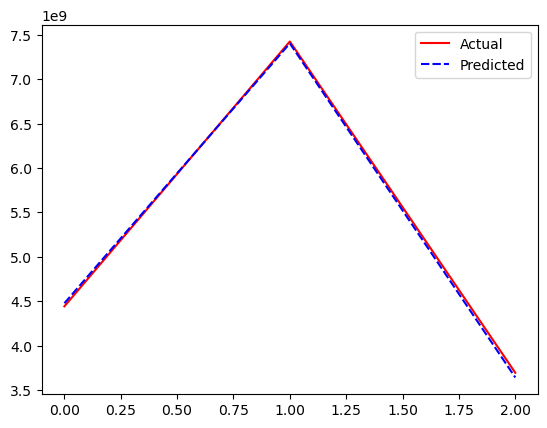

In [39]:
#Plotting lineplot from predictions
sns.lineplot(data=pred2, palette=['red', 'blue'])

### Case 3

In [40]:
#Predict on the X_test
y3_hat = LR3.predict(X3_test)
y3_hat

array([[4.46809422e+09],
       [7.41226135e+09],
       [3.62690360e+09],
       [8.00109478e+09]])

In [41]:
#Combine predictions and correct values in one dataframe
pred3 = pd.DataFrame(y3_test.iloc[:, 0].values)
y3_hat1d = y3_hat.flatten()
pred3['Predicted'] = y3_hat1d.tolist()
pred3.columns = ['Actual', 'Predicted'] 
pred3

,Actual,Predicted
0,4442400371,4.468094e+09
1,7424809761,7.412261e+09
2,3694136661,3.626904e+09
3,7973413042,8.001095e+09


<AxesSubplot:>

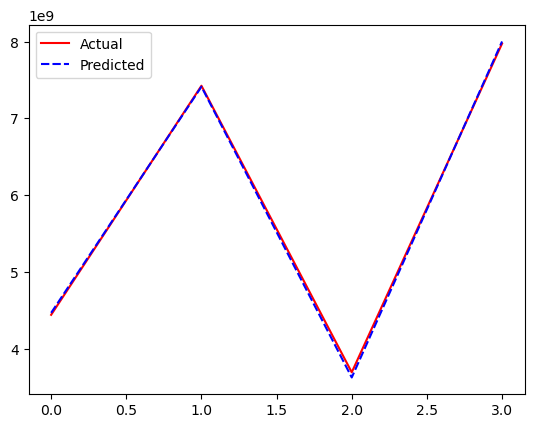

In [42]:
#Plotting lineplot from predictions
sns.lineplot(data=pred3, palette=['red', 'blue'])

## Evaluation

In order to evaluate the regression model the following three metrics are used
-  $MSE$: $\frac{1}{n}$ x $Σ_1^n$($Y_i$ - $P_i)^2$ where $Y$ = original value and $P$ = predicted value
-  $MAE$: $\frac{1}{n}$ x $Σ_1^n$|$Y_i$ - $P_i|$
-  $R^2: 1-\frac{SS_r}{SS_t}$

### Case 1

In [43]:
#Computing MSE, MAE, R using imported libraries
MSE1 = mean_squared_error(y1_test, y1_hat)
MAE1 = mean_absolute_error(y1_test, y1_hat)
R_square1 = r2_score(y1_test, y1_hat)

In [44]:
#Displaying Values to user with proper annotation
print('Mean Squared Error = ', MSE1.round(2))
print('Mean Absolute Error = ', MAE1.round(2))
print('R² = ', R_square1.round(4))

Mean Squared Error =  2248017762545238.5
Mean Absolute Error =  43273738.39
R² =  0.999


### Case 2

In [45]:
#Computing MSE, MAE, R using imported libraries
MSE2 = mean_squared_error(y2_test, y2_hat)
MAE2 = mean_absolute_error(y2_test, y2_hat)
R_square2 = r2_score(y2_test, y2_hat)

In [46]:
#Displaying Values to user with proper annotation
print('Mean Squared Error = ', MSE2.round(2))
print('MAE = ', MAE2.round(2))
print('R² = ', R_square2.round(4))

Mean Squared Error =  1493327644207052.8
MAE =  36420368.18
R² =  0.9994


### Case 3

In [47]:
#Computing MSE, MAE, R using imported libraries
MSE3 = mean_squared_error(y3_test, y3_hat)
MAE3 = mean_absolute_error(y3_test, y3_hat)
R_square3 = r2_score(y3_test, y3_hat)

In [48]:
#Displaying Values to user with proper annotation
print('Mean Squared Error = ', MSE3.round(2))
print('MAE = ', MAE3.round(2))
print('R² = ', R_square3.round(4))

Mean Squared Error =  1526049690267084.2
MAE =  33289261.88
R² =  0.9996


### Ideal Split

In [49]:
#Tabulate results
case = {'Testcase1': [MSE1.round(2),MAE1.round(2),R_square1.round(4)],'Testcase2': [MSE2.round(2),MAE2.round(2),R_square2.round(4)], 'Testcase3': [MSE3.round(2),MAE3.round(2),R_square3.round(4)]}
tabcase = pd.DataFrame(data=case, index=["MSE", "MAE", "R²"])
tabcase

,Testcase1,Testcase2,Testcase3
MSE,2.248018e+15,1.493328e+15,1.526050e+15
MAE,4.327374e+07,3.642037e+07,3.328926e+07
R²,9.990000e-01,9.994000e-01,9.996000e-01


### Case 4 Final prediction

In [50]:
#Using ideal model to find population number in future years
y = {'0': [2030,2050,2100]}
fyears = pd.DataFrame(data=y)
futurepred = LR2.predict(fyears.values)
#Tabulate results
fpop = futurepred.flatten()
fyears['1'] = fpop.tolist()
fyears.columns = ['Year', 'Prediction']
fyears

,Year,Prediction
0,2030,8.657390e+09
1,2050,1.032947e+10
2,2100,1.450968e+10
